In [1]:
# Initial Imports
import requests
import pandas as pd
import json
import numpy as np
from path import Path
from datetime import datetime
from datetime import timedelta
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Import API Key
from config import key

# Documentation:
#https://www.worldweatheronline.com/developer/my/analytics.aspx?key_id=222419

In [3]:
# Make a request to the worldweatheronline local history weather API page
def makeARequest(location, startDate, endDate, yourAPIKey):
    baseURL = "http://api.worldweatheronline.com/premium/v1/past-weather.ashx"
    timeInterval = "1"
    outputFormatToReturn = "json"

    requestURL = f"{baseURL}?q={location}&date={startDate}&enddate={endDate}&tp={timeInterval}&format={outputFormatToReturn}&key={yourAPIKey}"
    
    response = requests.get(requestURL)

    if response.status_code == 200:
        responseJson = response.json()
        return responseJson
    else:
        return print(response.status_code)

In [4]:
# Pull the wind variables from the responseJson 
def monthlyHistoricalWeather(firstDayOfMonth, lastDayOfMonth, jsonResponse):
    
    first = datetime.strptime(firstDayOfMonth, '%Y-%m-%d')
    last = datetime.strptime(lastDayOfMonth, '%Y-%m-%d')
    numberOfDays = last.day - first.day

    HourlyHistoricalWeather = []
    
    for day in np.arange(0,numberOfDays + 1,1):
        for hour in np.arange(0,24,1):
            HourlyHistoricalWeather.append({
                "Date" : jsonResponse["data"]["weather"][day]["date"],
                "Time" : jsonResponse["data"]["weather"][day]["hourly"][hour]["time"],
                "WindSpeed_mph" : jsonResponse["data"]["weather"][day]["hourly"][hour]["windspeedMiles"],
                "WindDirection_degrees" : jsonResponse["data"]["weather"][day]["hourly"][hour]["winddirDegree"],
                "WindGust_mph" : jsonResponse["data"]["weather"][day]["hourly"][hour]["WindGustMiles"],
                "Humidity_percent" : jsonResponse["data"]["weather"][day]["hourly"][hour]["humidity"],
                "Temp_F" : jsonResponse["data"]["weather"][day]["hourly"][hour]["tempF"]
            })

    return HourlyHistoricalWeather

In [5]:

# Store the variables in a DataFrame
def monthlyHistoricalWeatherDF(month):
    weatherDataFrame = pd.DataFrame(month)
    return weatherDataFrame

In [6]:
# Define the Latitude and longitude of Hackberry Wind Farm
    # https://www.thewindpower.net/windfarm_en_4012_hackberry.php
    # Latitude: 32.776111
    # Longitude: -99.476444
latLong = "32.776111,-99.476444"

In [7]:
# January
date = "2019-01-01"
enddate = "2019-01-31"

responseJson = makeARequest(latLong, date, enddate, key)

January = monthlyHistoricalWeather(date, enddate, responseJson)
JanuaryDF = monthlyHistoricalWeatherDF(January)
JanuaryDF.head()

,Date,Time,WindSpeed_mph,WindDirection_degrees,WindGust_mph,Humidity_percent,Temp_F
0,2019-01-01,0,12,126,24,73,35
1,2019-01-01,100,13,89,23,74,33
2,2019-01-01,200,14,53,23,76,32
3,2019-01-01,300,15,17,22,77,30
4,2019-01-01,400,14,18,21,77,29


In [8]:
# February
date = "2019-02-01"
enddate = "2019-02-28"

responseJson = makeARequest(latLong, date, enddate, key)

February = monthlyHistoricalWeather(date, enddate, responseJson)
FebruaryDF = monthlyHistoricalWeatherDF(February)

In [9]:

# March
date = "2019-03-01"
enddate = "2019-03-31"

responseJson = makeARequest(latLong, date, enddate, key)

March = monthlyHistoricalWeather(date, enddate, responseJson)
MarchDF = monthlyHistoricalWeatherDF(March)

In [10]:
# April
date = "2019-04-01"
enddate = "2019-04-30"

responseJson = makeARequest(latLong, date, enddate, key)

April = monthlyHistoricalWeather(date, enddate, responseJson)
AprilDF = monthlyHistoricalWeatherDF(April)

In [11]:

# May
date = "2019-05-01"
enddate = "2019-05-31"

responseJson = makeARequest(latLong, date, enddate, key)

May = monthlyHistoricalWeather(date, enddate, responseJson)
MayDF = monthlyHistoricalWeatherDF(May)

In [12]:
# June
date = "2019-06-01"
enddate = "2019-06-30"

responseJson = makeARequest(latLong, date, enddate, key)

June = monthlyHistoricalWeather(date, enddate, responseJson)
JuneDF = monthlyHistoricalWeatherDF(June)

In [13]:

# July
date = "2019-07-01"
enddate = "2019-07-31"

responseJson = makeARequest(latLong, date, enddate, key)

July = monthlyHistoricalWeather(date, enddate, responseJson)
JulyDF = monthlyHistoricalWeatherDF(July)

In [14]:
# August
date = "2019-08-01"
enddate = "2019-08-31"

responseJson = makeARequest(latLong, date, enddate, key)

August = monthlyHistoricalWeather(date, enddate, responseJson)
AugustDF = monthlyHistoricalWeatherDF(August)

In [15]:
# September
date = "2019-09-01"
enddate = "2019-09-30"

responseJson = makeARequest(latLong, date, enddate, key)

September = monthlyHistoricalWeather(date, enddate, responseJson)
SeptemberDF = monthlyHistoricalWeatherDF(September)

In [16]:
# October
date = "2019-10-01"
enddate = "2019-10-31"

responseJson = makeARequest(latLong, date, enddate, key)

October = monthlyHistoricalWeather(date, enddate, responseJson)
OctoberDF = monthlyHistoricalWeatherDF(October)

In [17]:
# November
date = "2019-11-01"
enddate = "2019-11-30"

responseJson = makeARequest(latLong, date, enddate, key)

November = monthlyHistoricalWeather(date, enddate, responseJson)
NovemberDF = monthlyHistoricalWeatherDF(November)

In [18]:
# December
date = "2019-12-01"
enddate = "2019-12-31"

responseJson = makeARequest(latLong, date, enddate, key)

December = monthlyHistoricalWeather(date, enddate, responseJson)
DecemberDF = monthlyHistoricalWeatherDF(December)

In [19]:
# Combine each month into a single DataFrame
hourlyWeatherDF2019 = JanuaryDF.append([FebruaryDF, MarchDF, AprilDF, MayDF, JuneDF, JulyDF, AugustDF, SeptemberDF, OctoberDF, NovemberDF, DecemberDF]) 
index = np.arange(0,24*365,1)
hourlyWeatherDF2019 = hourlyWeatherDF2019.set_index(index)
hourlyWeatherDF2019

,Date,Time,WindSpeed_mph,WindDirection_degrees,WindGust_mph,Humidity_percent,Temp_F
0,2019-01-01,0,12,126,24,73,35
1,2019-01-01,100,13,89,23,74,33
2,2019-01-01,200,14,53,23,76,32
3,2019-01-01,300,15,17,22,77,30
4,2019-01-01,400,14,18,21,77,29
...,...,...,...,...,...,...,...
8755,2019-12-31,1900,6,175,12,39,49
8756,2019-12-31,2000,6,176,13,42,47
8757,2019-12-31,2100,7,176,14,45,46
8758,2019-12-31,2200,7,176,15,46,46


In [20]:
hourlyWeatherDF2019.dtypes

Date                     object
Time                     object
WindSpeed_mph            object
WindDirection_degrees    object
WindGust_mph             object
Humidity_percent         object
Temp_F                   object
dtype: object

In [21]:
hourlyWeatherDF2019.to_csv(r'Output/hourlyWeatherDF2019.csv', index = False)

# Performing ETL on Wind Data at Hackberry Wind Farm

In [22]:
hourlyWeatherDF2019['Date'] = pd.to_datetime(hourlyWeatherDF2019['Date'] )

In [23]:
hourlyWeatherDF2019.dtypes

Date                     datetime64[ns]
Time                             object
WindSpeed_mph                    object
WindDirection_degrees            object
WindGust_mph                     object
Humidity_percent                 object
Temp_F                           object
dtype: object

In [24]:
hourlyWeatherDF2019['Time'] = hourlyWeatherDF2019['Time'].astype(int)

In [25]:
hourlyWeatherDF2019['Time'] = hourlyWeatherDF2019['Time']/100

In [26]:
hourlyWeatherDF2019['Time'] = hourlyWeatherDF2019['Time'].astype(int)

In [27]:
hourlyWeatherDF2019['time'] =pd.to_timedelta(hourlyWeatherDF2019['Time'], unit='h')

In [28]:
# Creating new column called 'hour' in timedelta format without date
hourlyWeatherDF2019['time'] = hourlyWeatherDF2019['time'] - pd.to_timedelta(hourlyWeatherDF2019['time'].dt.days, unit='d')

In [29]:
hourlyWeatherDF2019.dtypes

Date                      datetime64[ns]
Time                               int32
WindSpeed_mph                     object
WindDirection_degrees             object
WindGust_mph                      object
Humidity_percent                  object
Temp_F                            object
time                     timedelta64[ns]
dtype: object

In [30]:
# Combining Date and hour to a single column as they are in datetime and timedelta formats
hourlyWeatherDF2019['time_combined'] = hourlyWeatherDF2019['Date'] + hourlyWeatherDF2019['time']

In [31]:
# Dropping the original 'Time' column from 
hourlyWeatherDF2019 = hourlyWeatherDF2019.drop(['Time', 'Date', 'time'], 1)

In [32]:
# Renaming time column name.
hourlyWeatherDF2019.rename(columns = {'time_combined':'time'}, inplace = True)

In [33]:
# Re-arranging the column headers
hourlyWeatherDF2019 = hourlyWeatherDF2019[['time', 'WindSpeed_mph', 'WindDirection_degrees', 'WindGust_mph', 'Temp_F', 'Humidity_percent']]

In [34]:
hourlyWeatherDF2019['WindSpeed_mph'] = hourlyWeatherDF2019['WindSpeed_mph'].astype(int)

In [35]:
hourlyWeatherDF2019['WindDirection_degrees'] = hourlyWeatherDF2019['WindDirection_degrees'].astype(int)

In [36]:
hourlyWeatherDF2019['WindGust_mph'] = hourlyWeatherDF2019['WindGust_mph'].astype(int)

In [37]:
hourlyWeatherDF2019['Humidity_percent'] = hourlyWeatherDF2019['Humidity_percent'].astype(int)

In [38]:
hourlyWeatherDF2019['Temp_F'] = hourlyWeatherDF2019['Temp_F'].astype(int)

In [39]:
weather2019Clean = hourlyWeatherDF2019.drop(hourlyWeatherDF2019.index[0])

In [40]:
weather2019Clean.to_csv(r'Output/weather_wind.csv', index = False)

In [41]:
weather2019Clean.copy()

,time,WindSpeed_mph,WindDirection_degrees,WindGust_mph,Temp_F,Humidity_percent
1,2019-01-01 01:00:00,13,89,23,33,74
2,2019-01-01 02:00:00,14,53,23,32,76
3,2019-01-01 03:00:00,15,17,22,30,77
4,2019-01-01 04:00:00,14,18,21,29,77
5,2019-01-01 05:00:00,14,19,20,28,76
...,...,...,...,...,...,...
8755,2019-12-31 19:00:00,6,175,12,49,39
8756,2019-12-31 20:00:00,6,176,13,47,42
8757,2019-12-31 21:00:00,7,176,14,46,45
8758,2019-12-31 22:00:00,7,176,15,46,46


# Importing and Performing ETL on Hackberry Wind Energy Data

In [42]:
data = "Resources/Hackberry_Generation.csv"
Hackberry_df = pd.read_csv(data)
Hackberry_df

,Unit,Date,Hour Ending,MWH
0,HWF_HWFG1,20190101,100,110.487950
1,HWF_HWFG1,20190101,200,72.020225
2,HWF_HWFG1,20190101,300,67.639475
3,HWF_HWFG1,20190101,400,63.718900
4,HWF_HWFG1,20190101,500,61.264250
...,...,...,...,...
13866,HWF_HWFG1,20200731,2000,4.998600
13867,HWF_HWFG1,20200731,2100,16.390275
13868,HWF_HWFG1,20200731,2200,20.637800
13869,HWF_HWFG1,20200731,2300,13.998975


In [43]:
Hackberry_df.dtypes

Unit            object
Date             int64
Hour Ending     object
MWH            float64
dtype: object

In [44]:
# Dropping Unit Column
Hackberry_df = Hackberry_df.drop('Unit', 1)

In [45]:
# Renaming column name from 'Hour Ending' to 'Hour'
Hackberry_df.rename(columns = {'Hour Ending':'Hour'}, inplace = True)

In [46]:
# Converting Date to datetime
Hackberry_df['Date'] = pd.to_datetime(Hackberry_df['Date'], format='%Y%m%d')

In [47]:
# Checking data type
Hackberry_df.dtypes

Date    datetime64[ns]
Hour            object
MWH            float64
dtype: object

In [48]:
# Removing the last two characters from the hour column as the times are hourly
Hackberry_df['Hour'] = Hackberry_df['Hour'].astype(str).str[:-2].astype(np.int64)

In [49]:
# Checking Hour data type
Hackberry_df.dtypes

Date    datetime64[ns]
Hour             int64
MWH            float64
dtype: object

In [50]:
Hackberry_df['hour'] =pd.to_timedelta(Hackberry_df['Hour'], unit='h')

In [51]:
# Creating new column called 'hour' in timedelta format without date
Hackberry_df['hour'] = Hackberry_df['hour'] - pd.to_timedelta(Hackberry_df['hour'].dt.days, unit='d')

In [52]:
# Dropping the original 'Hour' column
Hackberry_df = Hackberry_df.drop('Hour', 1)

In [53]:
# Re-arranging the column headers
Hackberry_df = Hackberry_df[["Date", "hour", "MWH"]]

In [54]:
Hackberry_df.dtypes

Date     datetime64[ns]
hour    timedelta64[ns]
MWH             float64
dtype: object

In [55]:
# Combining Date and hour to a single column as they are in datetime and timedelta formats
Hackberry_df['time'] = Hackberry_df['Date'] + Hackberry_df['hour']

In [56]:
# Re-arranging the column headers and removing the Date and hour columns
Hackberry_df = Hackberry_df[["time", "MWH"]]

In [57]:
Hackberry_df.dtypes

time    datetime64[ns]
MWH            float64
dtype: object

In [58]:
Hackberry_df.copy()

,time,MWH
0,2019-01-01 01:00:00,110.487950
1,2019-01-01 02:00:00,72.020225
2,2019-01-01 03:00:00,67.639475
3,2019-01-01 04:00:00,63.718900
4,2019-01-01 05:00:00,61.264250
...,...,...
13866,2020-07-31 20:00:00,4.998600
13867,2020-07-31 21:00:00,16.390275
13868,2020-07-31 22:00:00,20.637800
13869,2020-07-31 23:00:00,13.998975


In [59]:
# Removing rows to include only 2019 year data to include same time range as wind data
Hackberry2019 = Hackberry_df.drop(Hackberry_df.index[8759:13871])

In [60]:
Hackberry2019.to_csv(r'Output/Hackberry_MHW.csv', index = False)

## Merging Hackberry Energy Data with Wind Data

In [61]:
hackberryWindMWH = pd.merge(weather2019Clean, Hackberry2019, on='time', how='outer')

In [62]:
hackberryWindMWH =hackberryWindMWH.drop(hackberryWindMWH.index[8760])

In [63]:
hackberryWindMWH.dtypes

time                     datetime64[ns]
WindSpeed_mph                   float64
WindDirection_degrees           float64
WindGust_mph                    float64
Temp_F                          float64
Humidity_percent                float64
MWH                             float64
dtype: object

In [64]:
hackberryWindMWH.to_csv(r'Output/Hackberry_Wind_MHW.csv', index = False)

In [65]:
hackberryWindMWH.copy()

,time,WindSpeed_mph,WindDirection_degrees,WindGust_mph,Temp_F,Humidity_percent,MWH
0,2019-01-01 01:00:00,13.0,89.0,23.0,33.0,74.0,110.487950
1,2019-01-01 02:00:00,14.0,53.0,23.0,32.0,76.0,72.020225
2,2019-01-01 03:00:00,15.0,17.0,22.0,30.0,77.0,67.639475
3,2019-01-01 04:00:00,14.0,18.0,21.0,29.0,77.0,63.718900
4,2019-01-01 05:00:00,14.0,19.0,20.0,28.0,76.0,61.264250
...,...,...,...,...,...,...,...
8755,2019-12-31 19:00:00,6.0,175.0,12.0,49.0,39.0,15.506725
8756,2019-12-31 20:00:00,6.0,176.0,13.0,47.0,42.0,32.191125
8757,2019-12-31 21:00:00,7.0,176.0,14.0,46.0,45.0,40.677250
8758,2019-12-31 22:00:00,7.0,176.0,15.0,46.0,46.0,45.826475


In [66]:
# There are 72 turbines in Hackberry Farm.
hackberryWindMWH['MWH'] = hackberryWindMWH['MWH']/72

In [67]:
hackberryWindMWH.dtypes

time                     datetime64[ns]
WindSpeed_mph                   float64
WindDirection_degrees           float64
WindGust_mph                    float64
Temp_F                          float64
Humidity_percent                float64
MWH                             float64
dtype: object

In [68]:
hackberry = hackberryWindMWH.dropna()

In [69]:
#hackberry["WindSpeed_mph"] = hackberry["WindSpeed_mph"].round(0).astype(int)

## Linear Regression

In [70]:
import warnings
warnings.filterwarnings('ignore')

In [71]:
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [72]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

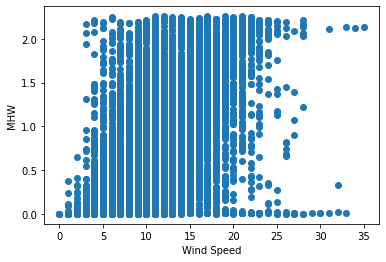

In [73]:
# Visually inspect the data
plt.scatter(hackberry.WindSpeed_mph, hackberry.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MHW')
plt.show()

##  It can be concluded that linear regression on wind speed alone does not track the power generated

In [74]:
# Save csv file to be used later without going through the ETL process.
hackberry.to_csv(r'Output/hackberry_encoded.csv', index = False)
hackberry.to_csv(r'Resources/hackberry_encoded.csv', index = False)

In [75]:
# Load the csv file from resources
data = "Resources/hackberry_encoded.csv"
hackberry_encoded = pd.read_csv(data)

In [76]:
hackberry_encoded = pd.get_dummies(hackberry_encoded, columns=['time'])

In [77]:
hackberry_encoded.head()

,WindSpeed_mph,WindDirection_degrees,WindGust_mph,Temp_F,Humidity_percent,MWH,time_2019-01-01 01:00:00,time_2019-01-01 02:00:00,time_2019-01-01 03:00:00,time_2019-01-01 04:00:00,...,time_2019-12-31 14:00:00,time_2019-12-31 15:00:00,time_2019-12-31 16:00:00,time_2019-12-31 17:00:00,time_2019-12-31 18:00:00,time_2019-12-31 19:00:00,time_2019-12-31 20:00:00,time_2019-12-31 21:00:00,time_2019-12-31 22:00:00,time_2019-12-31 23:00:00
0,13.0,89.0,23.0,33.0,74.0,1.534555,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14.0,53.0,23.0,32.0,76.0,1.000281,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15.0,17.0,22.0,30.0,77.0,0.939437,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,14.0,18.0,21.0,29.0,77.0,0.884985,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,14.0,19.0,20.0,28.0,76.0,0.850892,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
hackberry_encoded["WindSpeed_mph"] = hackberry_encoded["WindSpeed_mph"].round(0).astype(int)

In [80]:
hackberry_encoded["WindDirection_degrees"] = hackberry_encoded["WindDirection_degrees"].round(0).astype(int)

In [81]:
hackberry_encoded["Temp_F"] = hackberry_encoded["Temp_F"].round(0).astype(int)

In [82]:
hackberry_encoded["Humidity_percent"] = hackberry_encoded["Humidity_percent"].round(0).astype(int)

In [83]:
hackberry_encoded["WindGust_mph"] = hackberry_encoded["WindGust_mph"].round(0).astype(int)

In [84]:
hackberry_encoded["MWH"] = hackberry_encoded["MWH"].round(0).astype(int)

In [85]:
# Creating the scaler instance
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()

In [86]:
hackberry_scaled = data_scaler.fit_transform(hackberry_encoded)

In [87]:
hackberry_scaled[:5]

array([[ 0.3608004 , -1.05022902,  0.74188853, ..., -0.01068618,
        -0.01068618, -0.01068618],
       [ 0.56803347, -1.53116107,  0.74188853, ..., -0.01068618,
        -0.01068618, -0.01068618],
       [ 0.77526654, -2.01209313,  0.60454765, ..., -0.01068618,
        -0.01068618, -0.01068618],
       [ 0.56803347, -1.99873391,  0.46720677, ..., -0.01068618,
        -0.01068618, -0.01068618],
       [ 0.56803347, -1.98537468,  0.32986589, ..., -0.01068618,
        -0.01068618, -0.01068618]])

In [88]:
print(np.mean(hackberry_scaled[:,0]))
print(np.std(hackberry_scaled[:,0]))

-1.1196037626729142e-16
1.0


In [89]:
# Define the features set.
X = hackberry_encoded.copy()
X = X.drop("MWH", axis=1)
X.head()

,WindSpeed_mph,WindDirection_degrees,WindGust_mph,Temp_F,Humidity_percent,time_2019-01-01 01:00:00,time_2019-01-01 02:00:00,time_2019-01-01 03:00:00,time_2019-01-01 04:00:00,time_2019-01-01 05:00:00,...,time_2019-12-31 14:00:00,time_2019-12-31 15:00:00,time_2019-12-31 16:00:00,time_2019-12-31 17:00:00,time_2019-12-31 18:00:00,time_2019-12-31 19:00:00,time_2019-12-31 20:00:00,time_2019-12-31 21:00:00,time_2019-12-31 22:00:00,time_2019-12-31 23:00:00
0,13,89,23,33,74,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14,53,23,32,76,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,17,22,30,77,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14,18,21,29,77,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,14,19,20,28,76,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [90]:
# Define the target set.
y = hackberry_encoded["MWH"].ravel()
y[:5]

array([2, 1, 1, 1, 1])

# Multiple Linear Regression Model

In [91]:
from sklearn import linear_model

In [92]:
# with sklearn
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [93]:
predictions = lm.predict(X)

In [94]:
#The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and 
#v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().
#The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
#A constant model that always predicts the expected value of y,
#disregarding the input features, would get a R^2 score of 0.0.

lm.score(X,y)

0.9998952971666777

In [95]:
lm.coef_

array([-0.01915281,  0.00051106,  0.06747662, ...,  0.49588381,
        0.42586471,  0.35429258])

In [96]:
lm.intercept_

-0.5328499275074619

# Using Balanced Random Forest Classifier

In [97]:
# Resample the training data with the RandomOversampler
from imblearn.ensemble import BalancedRandomForestClassifier
brfc = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

Counter({0: 3089, 1: 2421, 2: 1058})

In [ ]:
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
brfc.fit(X_train, y_train)
Counter(y_train)

In [98]:
# Calculated the balanced accuracy score
y_pred = brfc.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7061678903028561

In [99]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[742, 165, 100],
       [129, 427, 217],
       [ 11,  59, 340]], dtype=int64)

In [100]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.84      0.74      0.88      0.79      0.81      0.64      1007
          1       0.66      0.55      0.84      0.60      0.68      0.45       773
          2       0.52      0.83      0.82      0.64      0.83      0.68       410

avg / total       0.72      0.69      0.86      0.69      0.77      0.58      2190



In [101]:
# List the features sorted in descending order by feature importance
importances = brfc.feature_importances_
sorted(zip(brfc.feature_importances_, X.columns), reverse=True)

[(0.18455733388097578, 'WindGust_mph'),
 (0.08468364630309458, 'WindSpeed_mph'),
 (0.08395041191811829, 'WindDirection_degrees'),
 (0.06248658563884681, 'Temp_F'),
 (0.05983917358876467, 'Humidity_percent'),
 (0.0005463807182342046, 'time_2019-03-20 11:00:00'),
 (0.0005418158451247025, 'time_2019-12-11 00:00:00'),
 (0.0005350423753622238, 'time_2019-06-11 00:00:00'),
 (0.0005278015370771928, 'time_2019-10-05 00:00:00'),
 (0.0005272814183402244, 'time_2019-08-23 18:00:00'),
 (0.0004998585471080218, 'time_2019-08-30 15:00:00'),
 (0.0004879116669753661, 'time_2019-12-14 00:00:00'),
 (0.00046399057628138834, 'time_2019-05-31 08:00:00'),
 (0.0004612403728213696, 'time_2019-03-31 04:00:00'),
 (0.00045895584767577776, 'time_2019-12-07 00:00:00'),
 (0.0004497292985437827, 'time_2019-07-04 07:00:00'),
 (0.00044769546078256175, 'time_2019-06-20 06:00:00'),
 (0.00044705256014810095, 'time_2019-11-03 00:00:00'),
 (0.0004381802757444118, 'time_2019-02-06 22:00:00'),
 (0.0004347851119731592, 'time_2

# Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [104]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [105]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 

In [106]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [107]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [109]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

In [110]:
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.7264840182648402


In [111]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([0.08898393, 0.08906285, 0.15953834, ..., 0.        , 0.        ,
       0.        ])

In [112]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.15953833995207736, 'WindGust_mph'),
 (0.08906284564687181, 'WindDirection_degrees'),
 (0.0889839296832079, 'WindSpeed_mph'),
 (0.06030329007368171, 'Temp_F'),
 (0.059218265258528836, 'Humidity_percent'),
 (0.00036663075924952486, 'time_2019-11-29 00:00:00'),
 (0.00035270389921668543, 'time_2019-08-02 04:00:00'),
 (0.00034732779986733223, 'time_2019-11-06 00:00:00'),
 (0.0003414834526121803, 'time_2019-09-13 07:00:00'),
 (0.00032402385410632326, 'time_2019-12-18 00:00:00'),
 (0.0003221356615475382, 'time_2019-09-13 09:00:00'),
 (0.00032111570521797697, 'time_2019-06-11 00:00:00'),
 (0.0003191851272109639, 'time_2019-03-26 07:00:00'),
 (0.0003188751097980499, 'time_2019-07-13 01:00:00'),
 (0.0003149494077763082, 'time_2019-03-20 11:00:00'),
 (0.0003131025520876221, 'time_2019-08-30 23:00:00'),
 (0.00031286240564166605, 'time_2019-12-07 00:00:00'),
 (0.0003120576727947418, 'time_2019-11-06 06:00:00'),
 (0.0003110277431222009, 'time_2019-05-31 08:00:00'),
 (0.00030975585590296465, 'tim

In [116]:
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1007
           1       0.62      0.73      0.67       773
           2       0.69      0.56      0.62       410

    accuracy                           0.73      2190
   macro avg       0.72      0.69      0.70      2190
weighted avg       0.73      0.73      0.73      2190



# AdaBoostClassifier

In [117]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [118]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1)

In [119]:
#Forest to be composed of trees with a single decision node and two leaves. 400 estimators to specify the total number of trees in forest
classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=400)
classifier.fit(train_X, train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=400)

In [120]:
predictions = classifier.predict(test_X)

In [121]:
confusion_matrix(test_y, predictions)

array([[720, 232,  53],
       [338, 378, 108],
       [ 35, 129, 197]], dtype=int64)

In [122]:
classifier.score(X, y)

0.6334779630052524